In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Loading dataset
data=pd.read_csv("C:/Recent Download/winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
data.shape

(6497, 13)

In [5]:
#Missing values
data.isnull().sum().sort_values(ascending=False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

There are Missing values in data set.

In [6]:
missing_col = ["fixed acidity", "pH", "volatile acidity", "sulphates", "citric acid", "residual sugar", "chlorides"]


In [7]:
for col in missing_col:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

In [8]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no more missing values in data

In [9]:
data['type'].value_counts()

white    4898
red      1599
Name: type, dtype: int64

There are 75% White wine and 25% red wine

In [10]:
data['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [11]:
#Des Stats
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


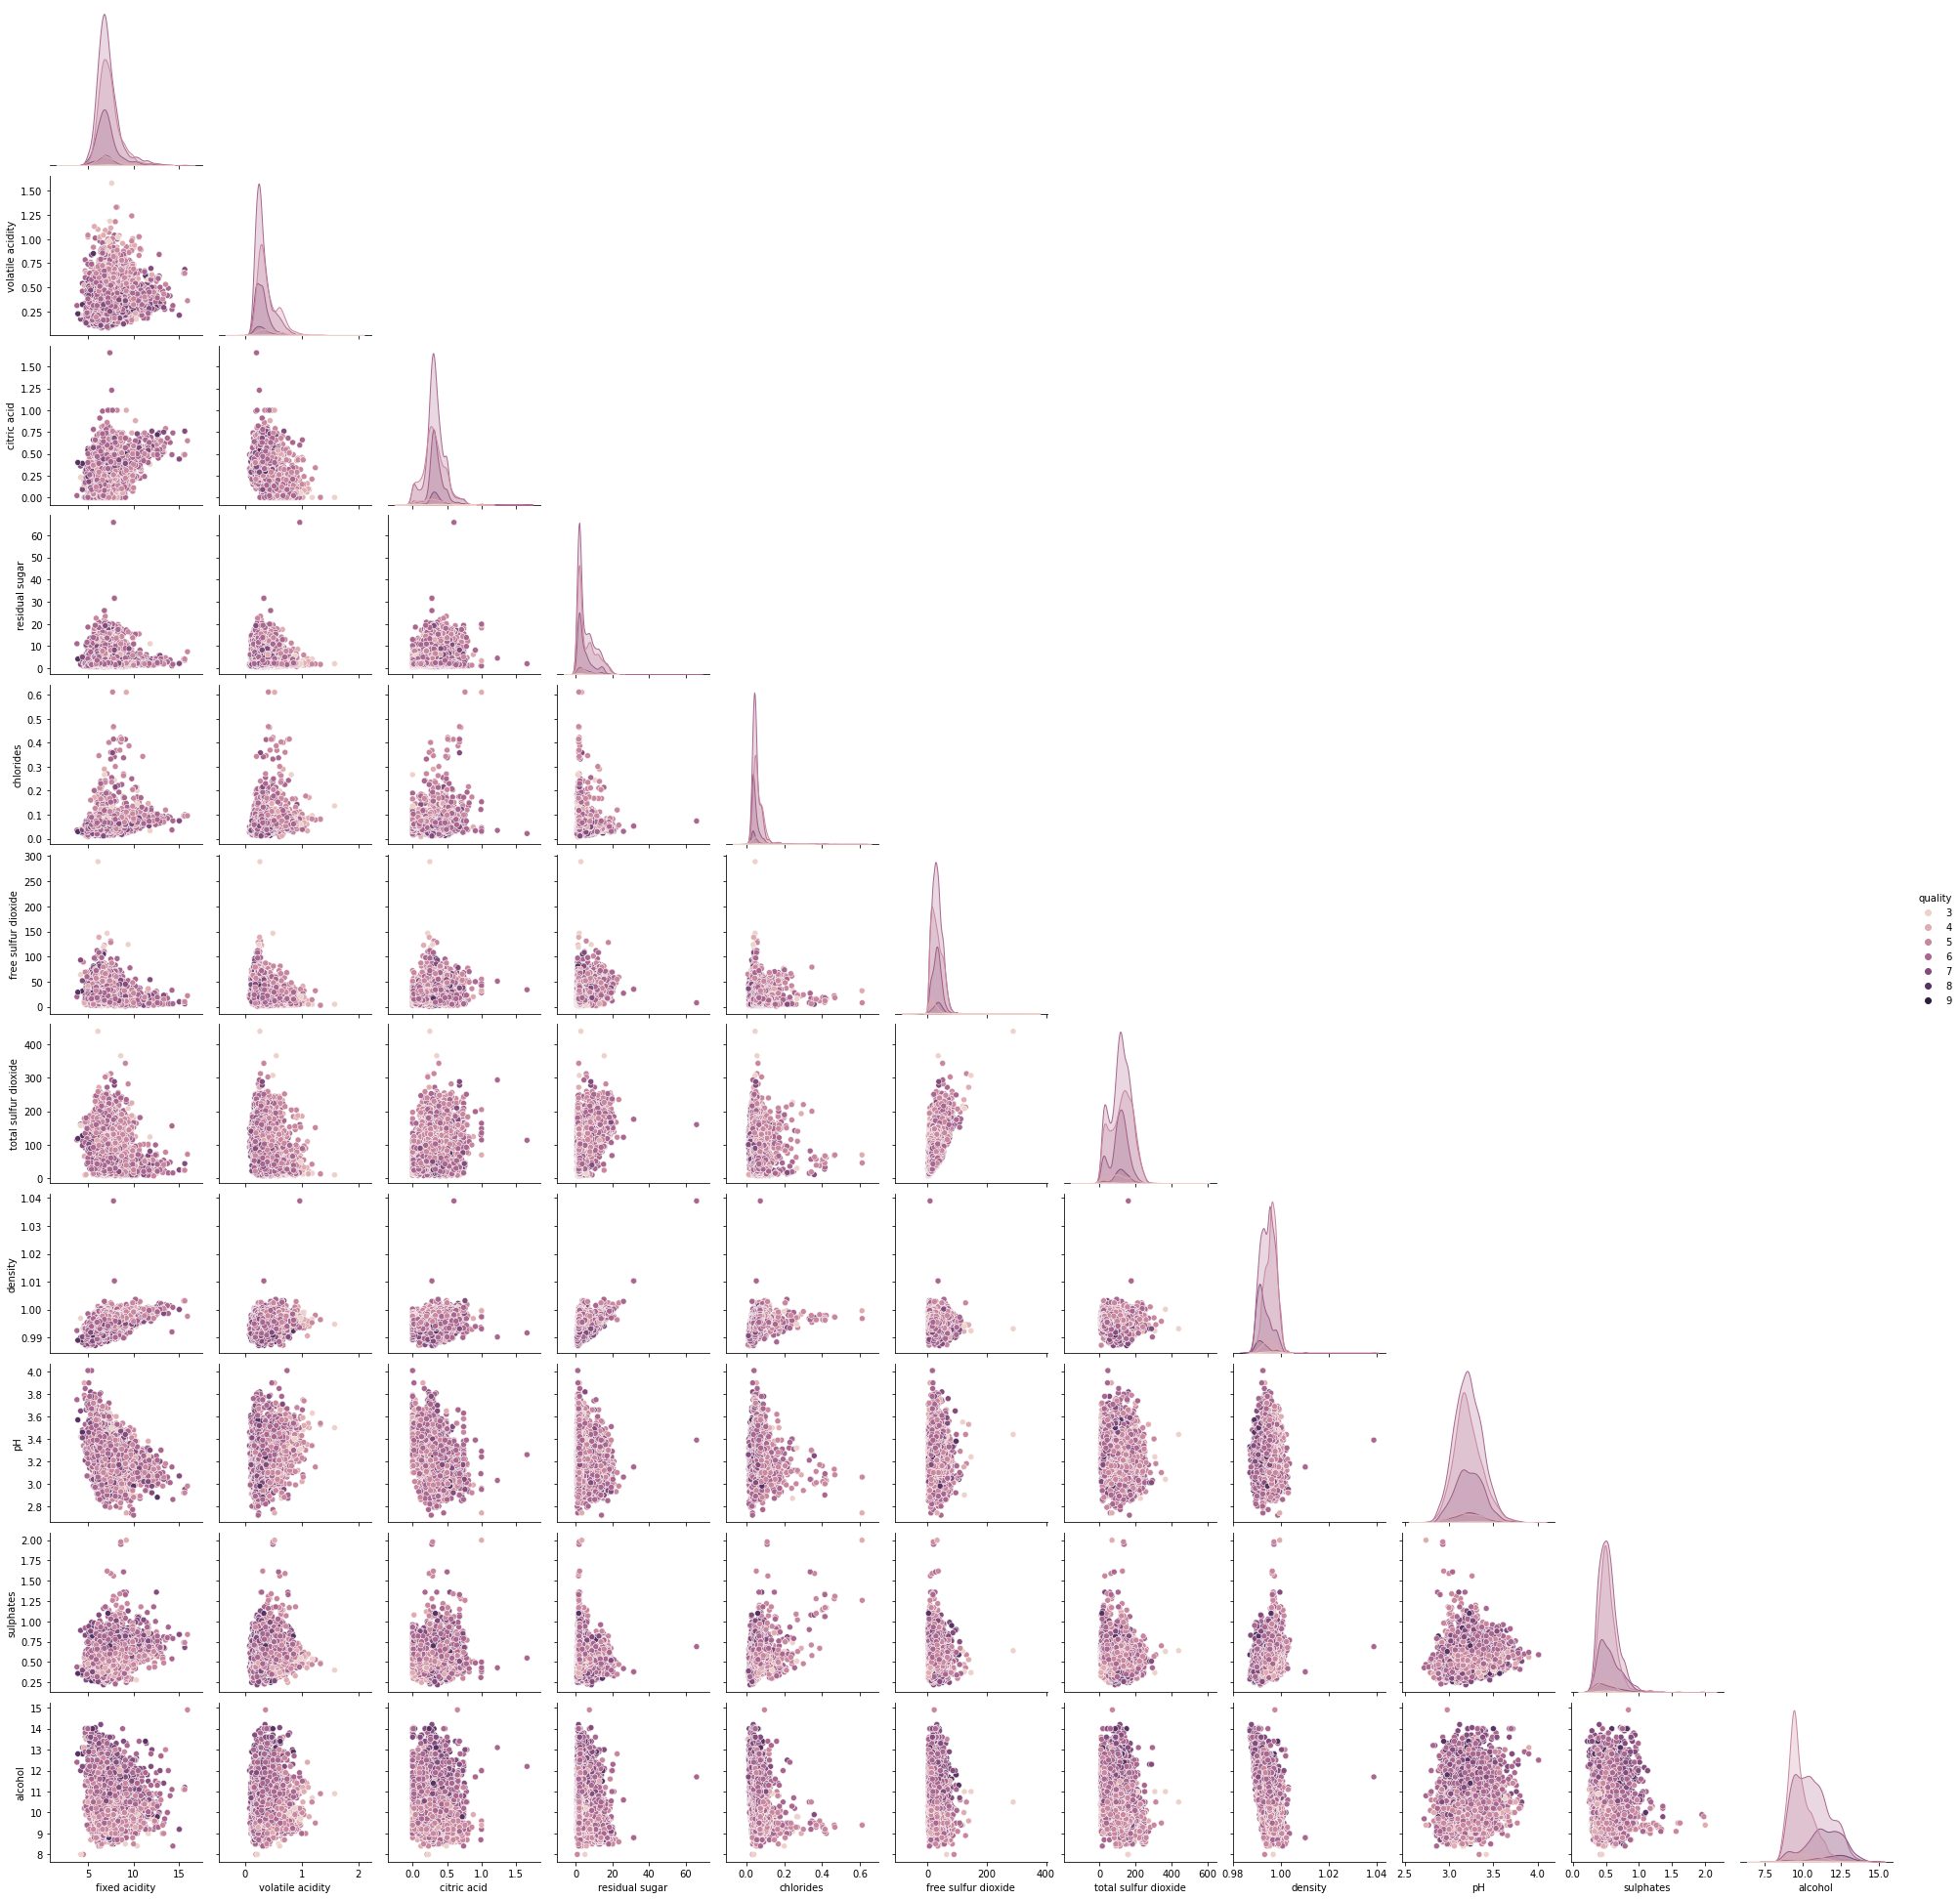

In [12]:
#Relation between
data.corr()
sns.pairplot(data,hue='quality', corner=True)

<AxesSubplot:>

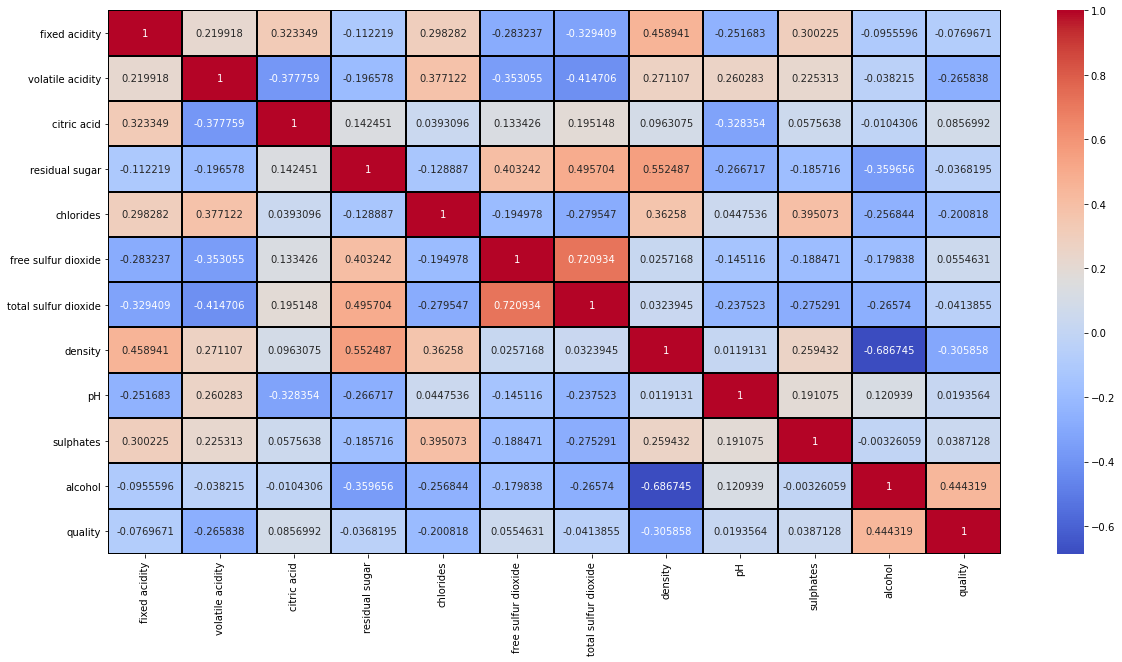

In [13]:
corr=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap='coolwarm',fmt='g',linewidths=1,linecolor='black')

There is negative corelation between density and alcohol & Free sulphur dioxide and total sulfur dioxide is highly corelated

<AxesSubplot:xlabel='type', ylabel='count'>

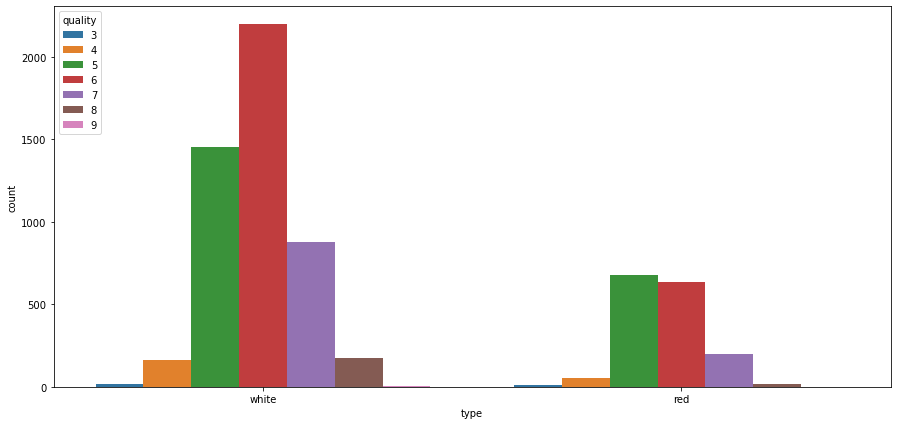

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(x='type',hue='quality',data=data)

The quality of white wine is more than red wine

<Figure size 1080x576 with 0 Axes>

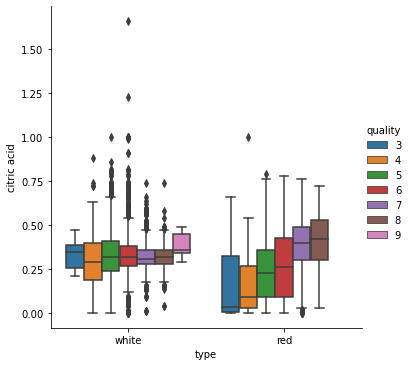

In [15]:
plt.figure(figsize=(15,8))
sns.catplot(x="type", y="citric acid", kind="box", hue="quality", data=data)


there are outliers in white wine

In [48]:
data=pd.get_dummies(data,drop_first=True)

In [49]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_quality', 'type_white'],
      dtype='object')

In [56]:
data=data.rename(columns={"type_white": "wine_type"})
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6,0,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6,0,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6,0,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5,0,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6,0,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6,0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5,0,0


In [57]:
data["wine_quality"] = [1 if x>6 else 0 for x in data.quality]


In [65]:
y=data["wine_quality"]

In [66]:
y

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: wine_quality, Length: 6497, dtype: int64

In [60]:
x=data.drop(["quality", "wine_quality"], axis=1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,0


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [110]:
log = pd.DataFrame(columns=["model", "accuracy"])

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [112]:
#Logistic Regression
clf = LogisticRegression(solver='liblinear')

clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

clf.score(x_train, y_train)

score = accuracy_score(y_test, y_pred)

confusion_matrix(y_test, y_pred)


array([[1013,   34],
       [ 195,   58]], dtype=int64)

In [113]:
log = log.append({"model": "logistic regression", "accuracy": score}, ignore_index=True)


In [114]:
#SVM
from sklearn.svm import SVC
model = SVC(kernel="rbf",C=1)

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

score = accuracy_score(y_test, y_pred)

In [115]:
confusion_matrix(y_test, y_pred)


array([[1047,    0],
       [ 253,    0]], dtype=int64)

In [116]:
log = log.append({"model": "SVC", "accuracy": score}, ignore_index=True)

In [117]:
log

,model,accuracy
0,logistic regression,0.823846
1,SVC,0.805385


In [118]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier(criterion='gini',max_depth=4)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)

score = accuracy_score(y_test, y_pred)

In [119]:
log = log.append({"model": "Decision tree", "accuracy": score}, ignore_index=True)


In [120]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

score = accuracy_score(y_test, y_pred)

In [121]:
log = log.append({"model": "Random Forest", "accuracy": score}, ignore_index=True)


In [122]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)

score = accuracy_score(y_test, y_pred)

In [123]:
log = log.append({"model": "KNN", "accuracy": score}, ignore_index=True)


In [124]:
log

,model,accuracy
0,logistic regression,0.823846
1,SVC,0.805385
2,Decision tree,0.824615
3,Random Forest,0.877692
4,KNN,0.803077


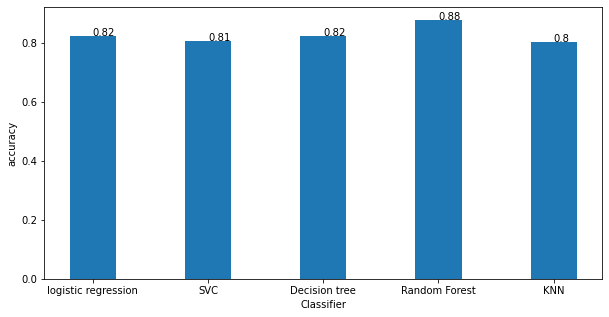

In [125]:
plt.figure(figsize=(10, 5))
plt.bar(log["model"], log["accuracy"], width=0.4)
plt.xlabel("Classifier")
plt.ylabel("accuracy")
for index, value in enumerate(log["accuracy"]):
    plt.text(index,value, str(round(value, 2)))
plt.show()


As Random Forest gives us the best accuracy.It is the best model to predict that the quality of white wine is better than red wine quality